In [107]:
#爬文
import feedparser
import requests
from bs4 import BeautifulSoup

#解析RSS
rss_url = 'https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money'
newsFeed = feedparser.parse(rss_url)

#設定 request header & cookie
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'
my_headers = {
    'User-Agent': user_agent,
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-Language':'zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7',
    'cache-control': 'max-age=0'
}
my_cookie = cookiejar.CookieJar()

#爬新聞內容
each_article_text_list = []
for e in newsFeed['entries']:
    title = e['title']
    url = e['links'][0]['href']
    #print(title, url)
    
    res = requests.get(url, headers = my_headers, cookies = my_cookie)
    content = res.text
    soup = BeautifulSoup(content, 'lxml')

    for p in soup.find_all('p'):
        each_article_text_list.append(p.text)
        all_article_text = ' '.join(each_article_text_list)
all_article_text

"韓國流行病學家發現，相較於戶外接觸感染，民眾更有可能被家人傳染而感染2019冠狀病毒疾病（COVID-19，俗稱武漢肺炎）。 \n這項7月16日在美國疾病管制暨預防中心（CDC）發表的研究報告，審慎研究5706名病毒檢測呈陽性的「源頭病患」（index patients），以及5萬9000名因接觸源頭病患而感染的患者。 \n研究結果顯示，100個患者中，只有2人來自非家庭傳染，卻有1/10被自家人傳染而染疫。 \n就年齡層而論，當首個確診病例是10來歲青少年或60多歲及70多歲的長輩時，家庭內感染率更高。 \n研究報告作者之一、韓國中央防疫對策本部長鄭銀敬表示：「這或許是因為這些年齡族群更有可能與家人密切接觸，因為這些年齡族群更需要保護或支援。」 \n相較於成人，兒童感染武漢肺炎更可能成為無症狀感染者，比較不容易在這個年齡族群中找出源頭患者。（譯者：曹宇帆/核稿：劉學源）1090721 《勞退新制小攻略》 點我領取 》我的投資組合\xa0\xa0》類股觀測\xa0\xa0 》即時排行\xa0\xa0》即時選股 》即時走勢\xa0\xa0》即時報價 美國國務卿蓬佩奧今天鼓勵其他國家挺身對抗中國共產黨，並說中國領導階層是個威脅。他也恭喜英國決定排除中國電信業者華為參與5G網路建設。 \n路透社報導，蓬佩奧（Mike Pompeo）拜會英國首相強生（Boris Johnson）和內閣大臣後告訴記者：「對於每個了解自由民主，珍惜這些價值而且知道它們對自己人民和國家很重要的國家，我們都希望他們成功，而且了解中國共產黨對他們構成的威脅。」 \n對於英國決定封殺華為，蓬佩奧表示：「我想英國作了個好決定。」 \n他又說，美國希望確保「屬於美國人的個人資訊不要落在中國共產黨手裡」。 《勞退新制小攻略》 點我領取 》我的投資組合\xa0\xa0》類股觀測\xa0\xa0 》即時排行\xa0\xa0》即時選股 》即時走勢\xa0\xa0》即時報價 可口可樂公司（Coca-Cola）21日公布財報，6月26日為止單季營收較去年同期減少28%，原因是新冠肺炎疫情造成餐館、電影院和運動場關閉而受到打擊，但汽水需求好轉，22日早盤股價一度大漲逾4%。 \n \r\n這家全球最大飲料製造商表示，經過今年「最具挑戰性」一季後，汽水需求正在好轉。 \n \r\n可口可樂上季經調整後營收為71.8億美

In [150]:
#stop word
with open(file='data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '的',
 '了',
 '和',
 '是',
 '這',
 '但',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '一個',
 '沒有',
 '因為',
 '通常',
 '例如',
 '我',
 '你',
 '他',
 '她',
 '它',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '它們',
 '是否',
 '點我',
 '領取',
 '組合',
 '即時',
 '表示']

In [151]:
import pandas as pd
import jieba

#stop word過濾後的分詞結果
seg_stop_words_list = []
seg_words_list = jieba.lcut(all_article_text)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
        seg_words = ' '.join(seg_stop_words_list)
        
        #去除標點符號
        punc = '，。（）「」《》![]{}:;?'
        for ele in seg_words:
            if ele in punc:
                seg_words = seg_words.replace(ele, '')
print(seg_words)

韓國 流行病學 家 發現  相較 於 戶外 接觸 感染  民眾 更 有 可能 被 家人 傳染 感染 2019 冠狀病毒 疾病  COVID - 19  俗稱 武漢 肺炎     
 這項 7 月 16 日 在 美國 疾病 管制 暨 預防 中心  CDC  發表 研究 報告  審慎 研究 5706 名 病毒檢測 呈 陽性  源頭 病患   index   patients   以及 5 萬 9000 名因 接觸 源頭 病患 感染 患者    
 研究 結果顯示  100 個 患者 中  只有 2 人 來自 非 家庭 傳染  卻 有 1 / 10 被 自家人 傳染 而染疫    
 年齡層 而論  當 首個 確診 病例 10 來 歲 青少年 60 多歲 70 多歲 長輩 時  家庭 內 感染率 更高    
 研究 報告 作者 之一 、 韓國 中央 防疫 對策 本 部長 鄭銀敬 ：  或許 這些 年齡 族群 更 有 可能 家人 密切接觸  這些 年齡 族群 更 需要 保護 支援     
 相較 於 成人  兒童 感染 武漢 肺炎 更 可能 成為 無症狀 感染者  比較 不 容易 在 這個 年齡 族群 中 找出 源頭 患者   譯者 ： 曹宇帆 / 核稿 ： 劉學源  1090721    勞退 新制 小 攻略       投資      類股 觀測        排行      選股    走勢      報價   美國 國務卿 蓬佩奧 今天 鼓勵 其他 國家 挺身 對抗 中國共產黨  並說 中國 領導階層 個 威脅  也 恭喜 英國 決定 排除 中國電信 業者 華為 參與 5G 網路 建設    
 路透社 報導  蓬佩奧  Mike   Pompeo  拜會 英國首相 強生  Boris   Johnson  內閣大臣 後 告訴 記者 ：  對於 每個 了解 自由民主  珍惜 這些 價值 而且 知道 對 自己 人民 國家 很 重要 國家  希望 成功  而且 了解 中國共產黨 對 構成 威脅     
 對於 英國 決定 封殺 華為  蓬佩奧 ：  想 英國 作 個 好 決定     
 又 說  美國 希望 確保  屬於 美國 人 個人 資訊 不要 落 在 中國共產黨 手裡      勞退 新制 小 攻略       投資      類股 觀測        排

In [152]:
#關鍵字提取(回頭新增stop words)
import jieba.analyse
tags = jieba.analyse.extract_tags(seg_words, topK=10, withWeight=True)
for tag in tags:
    print('word:', tag[0], 'tf-idf:', tag[1])

word: 英國 tf-idf: 0.09293196130985695
word: 投資 tf-idf: 0.08549740440506841
word: 美國 tf-idf: 0.08178012595267413
word: 類股 tf-idf: 0.07806284750027985
word: 中國 tf-idf: 0.07806284750027985
word: 勞退 tf-idf: 0.07434556904788557
word: 觀測 tf-idf: 0.07434556904788557
word: 選股 tf-idf: 0.07434556904788557
word: 走勢 tf-idf: 0.07434556904788557
word: 報價 tf-idf: 0.07434556904788557


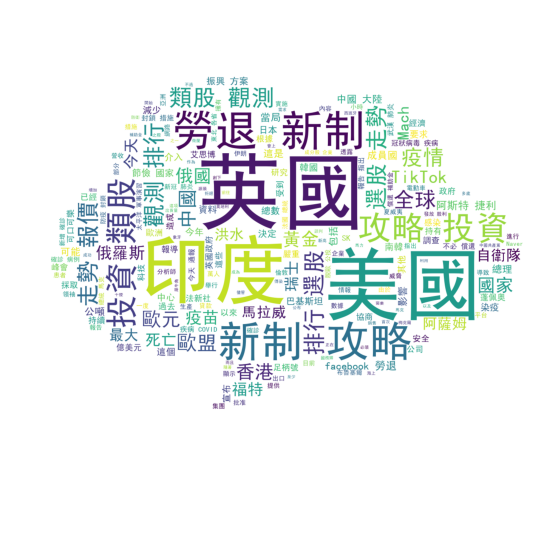

In [162]:
#繪製文字雲
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np

mask = np.array(Image.open('cloud.jpg'))
font = 'fonts/SimHei.ttf'
wc = WordCloud(
    font_path=font,
    width = 1600,
    height = 800,
    max_font_size = 200,
    background_color='white', 
    mask=mask).generate(seg_words)
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [164]:
#圖片存檔
wc.to_file('word_cloud.png')